### For my final project, I'm analyzing the Climate Change dataset from [Kaggle](http://www.kaggle.com).
The dataset was downloaded from https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data. 

#### Discussion on Data:

The data on climate change is extensive, including 3192 months of average land and ocean temperatures and "uncertainties" from 1750 through the end of 2015. The Kaggle data description doesn't do a very good job of detailing key units of measurement such as celcius vs. farenheit and doesn't explain how the units in the "uncertainty" columns are used. However, the source, Berkeley Earth, [site](http://berkeleyearth.org/data/) gives more detail. One could deduce that average temperatures are in Celcius, and the source site backs that up. But the values for uncertainty are still unclear. It is listed as the "95% CI's around" the various statistics, but it's hard to say at first glance if those are the highest values above the statistics or listed as +/- values above/below the statistics. Only after examining the tail of the dataset can you presume that they should be +/- values since they get more accurate over time.

Richard Muller's synopsis on background of this data collection from Berkeley: https://www.youtube.com/watch?v=Sme8WQ4Wb5w

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

Populating the interactive namespace from numpy and matplotlib


In [2]:
temps = pd.read_csv('GlobalLandTemperatures/GlobalTemperatures.csv')
temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
new_names = []

for col in temps.columns:
    new_names.append(col.replace('Land', '', len(col)).replace('Average', 'avg', len(col)).replace('Temperature', 'temp', len(col)).replace('Uncertainty', 'uncert', len(col)).lower())

temps.columns = new_names
temps = temps.rename(columns = {'andoceanavgtemp':'l_oavgtemp', 'andoceanavgtempuncert':'l_oavgtempuncert'})

print(temps.columns)

Index(['dt', 'avgtemp', 'avgtempuncert', 'maxtemp', 'maxtempuncert', 'mintemp',
       'mintempuncert', 'l_oavgtemp', 'l_oavgtempuncert'],
      dtype='object')


In [12]:
engine = create_engine('sqlite:///temps.db')
conn = engine.connect()
temps.to_sql('temp_avgs', conn)

In [4]:
%load_ext sql

/Users/victorvulovic/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/victorvulovic/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [5]:
%sql sqlite:///temps.db

'Connected: None@temps.db'

# SQL


In [6]:
%%sql
SELECT * FROM temp_avgs
LIMIT 3;

Done.


index,dt,avgtemp,avgtempuncert,maxtemp,maxtempuncert,mintemp,mintempuncert,l_oavgtemp,l_oavgtempuncert
0,1750-01-01,3.0340000000000003,3.574,None,None,None,None,None,None
1,1750-02-01,3.083,3.702,None,None,None,None,None,None
2,1750-03-01,5.626,3.076,None,None,None,None,None,None


In [7]:
%%sql
SELECT * FROM temp_avgs
ORDER BY dt DESC
LIMIT 3;

Done.


index,dt,avgtemp,avgtempuncert,maxtemp,maxtempuncert,mintemp,mintempuncert,l_oavgtemp,l_oavgtempuncert
3191,2015-12-01,5.518,0.1,10.725,0.154,0.2869999999999997,0.099,14.774000000000001,0.062
3190,2015-11-01,7.433,0.11900000000000001,12.892,0.09300000000000001,2.157,0.106,15.252,0.063
3189,2015-10-01,10.800999999999998,0.102,16.45,0.059000000000000004,5.231999999999998,0.115,16.29,0.062


In [8]:
%%sql
SELECT dt, MAX(maxtemp) AS absolutemax
FROM temp_avgs;

Done.


dt,absolutemax
2011-07-01,21.32


In [9]:
%%sql
SELECT dt, MIN(mintemp) AS absolutemin 
FROM temp_avgs;

Done.


dt,absolutemin
1857-01-01,-5.407


In [10]:
%%sql
SELECT AVG(avgtemp) 
FROM temp_avgs;

Done.


AVG(avgtemp)
8.374731132075466


# EDA

In [11]:
temps.describe()

/Users/victorvulovic/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,avgtemp,avgtempuncert,maxtemp,maxtempuncert,mintemp,mintempuncert,l_oavgtemp,l_oavgtempuncert
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


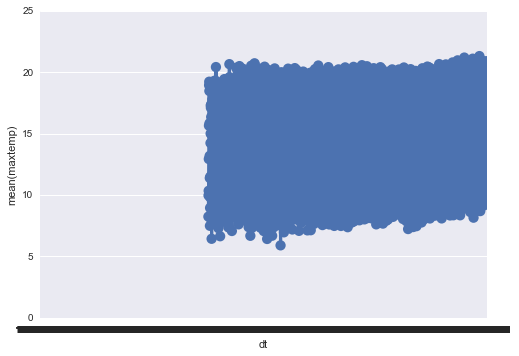

In [23]:
sns.pointplot(x="dt", y="avgtemp", data=temps)

ValueError: could not convert string to float: '2015-12-01'

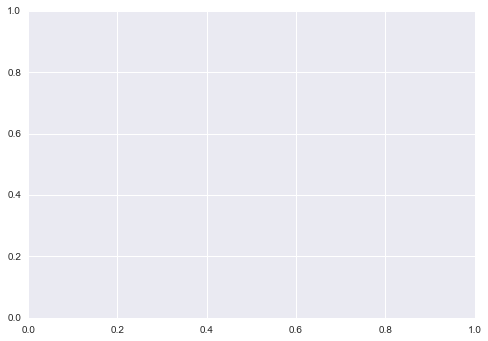

In [24]:
plt.plot(temps['dt'], temps['avgtemp'])
plt.ylabel('avgtemp')
plt.show()